'Partition_layout.png'

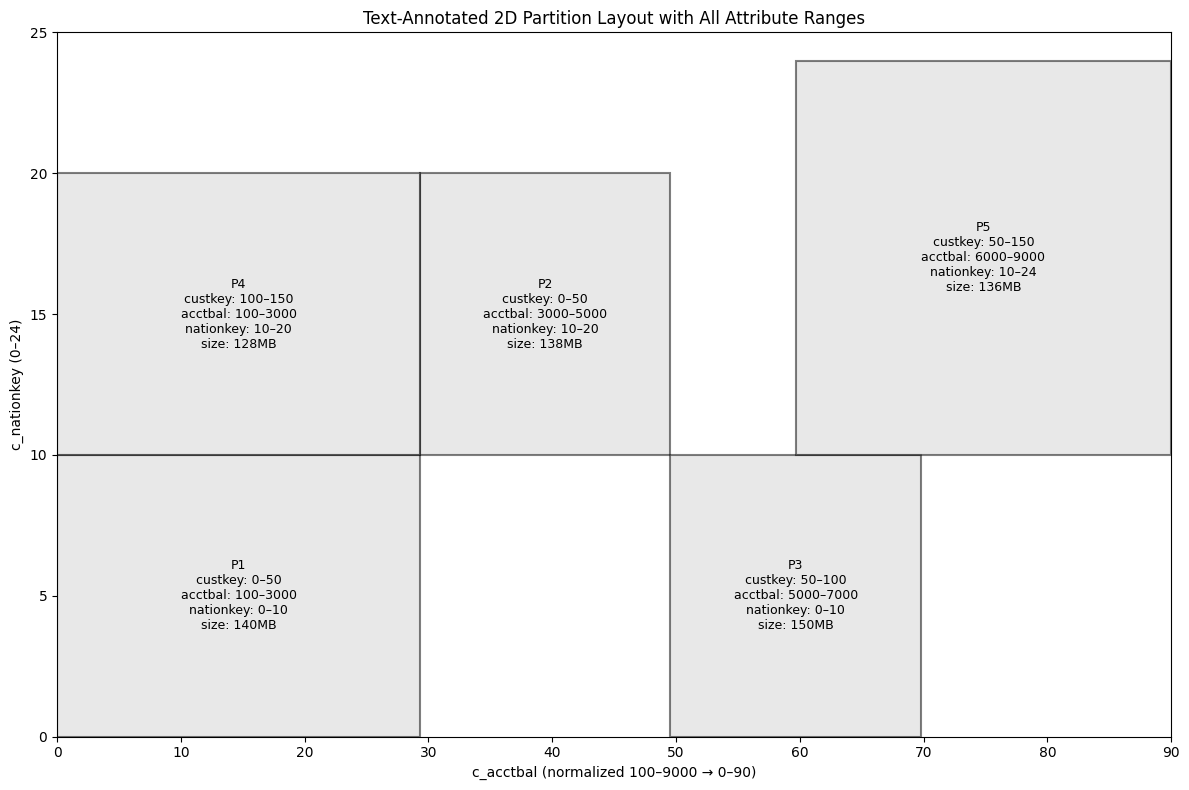

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Partition definitions
partitions = {
    "P1": {"custkey": (0, 50), "acctbal": (100, 3000), "nationkey": (0, 10), "size": 140},
    "P2": {"custkey": (0, 50), "acctbal": (3000, 5000), "nationkey": (10, 20), "size": 138},
    "P3": {"custkey": (50, 100), "acctbal": (5000, 7000), "nationkey": (0, 10), "size": 150},
    "P4": {"custkey": (100, 150), "acctbal": (100, 3000), "nationkey": (10, 20), "size": 128},
    "P5": {"custkey": (50, 150), "acctbal": (6000, 9000), "nationkey": (10, 24), "size": 136},
}

# Normalize acctbal range for x-axis (0–90)
acctbal_min, acctbal_max = 100, 9000

def normalize(val, min_val, max_val, scale=90):
    return (val - min_val) / (max_val - min_val) * scale

fig, ax = plt.subplots(figsize=(12, 8))

for i, (name, p) in enumerate(partitions.items()):
    x0 = normalize(p["acctbal"][0], acctbal_min, acctbal_max)
    x1 = normalize(p["acctbal"][1], acctbal_min, acctbal_max)
    y0 = p["nationkey"][0]
    y1 = p["nationkey"][1]
    width = x1 - x0
    height = y1 - y0

    # Rectangle for partition
    rect = patches.Rectangle((x0, y0), width, height, linewidth=1.5, edgecolor='black',
                             facecolor='lightgrey', alpha=0.5)
    ax.add_patch(rect)

    # Annotated label
    label = (f"{name}\n"
             f"custkey: {p['custkey'][0]}–{p['custkey'][1]}\n"
             f"acctbal: {p['acctbal'][0]}–{p['acctbal'][1]}\n"
             f"nationkey: {p['nationkey'][0]}–{p['nationkey'][1]}\n"
             f"size: {p['size']}MB")
    
    ax.text(x0 + width/2, y0 + height/2, label,
            ha='center', va='center', fontsize=9, color='black')

# Axes formatting
ax.set_xlim(0, 90)
ax.set_ylim(0, 25)
ax.set_xlabel("c_acctbal (normalized 100–9000 → 0–90)")
ax.set_ylabel("c_nationkey (0–24)")
ax.set_title("Text-Annotated 2D Partition Layout with All Attribute Ranges")
plt.grid(False)
plt.tight_layout()

# Save image
image_path = "Partition_layout.png"
plt.savefig(image_path)
image_path
